In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
# download historical data for MSFT since 2010 to 2025
df = yf.download("MSFT", start="2010-01-01", end="2025-01-01")

/var/folders/g0/7_twh6bj5yvgxhmm1f5x3xxnw0xbbk/T/ipykernel_1043/303994258.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("MSFT", start="2010-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2010-01-04,23.130058,23.242158,22.861017,22.883437,38409100
2010-01-05,23.137526,23.242154,22.898378,23.055320,49749600
2010-01-06,22.995529,23.227203,22.808695,23.077735,58182400
2010-01-07,22.756384,22.943218,22.562076,22.890903,50559700
2010-01-08,22.913326,23.077740,22.599445,22.629339,51197400


In [5]:
df.columns = ['close', 'high', 'low', 'open', 'vlm']

In [6]:
df.head()

,close,high,low,open,vlm
Date,,,,,
2010-01-04,23.130058,23.242158,22.861017,22.883437,38409100
2010-01-05,23.137526,23.242154,22.898378,23.055320,49749600
2010-01-06,22.995529,23.227203,22.808695,23.077735,58182400
2010-01-07,22.756384,22.943218,22.562076,22.890903,50559700
2010-01-08,22.913326,23.077740,22.599445,22.629339,51197400


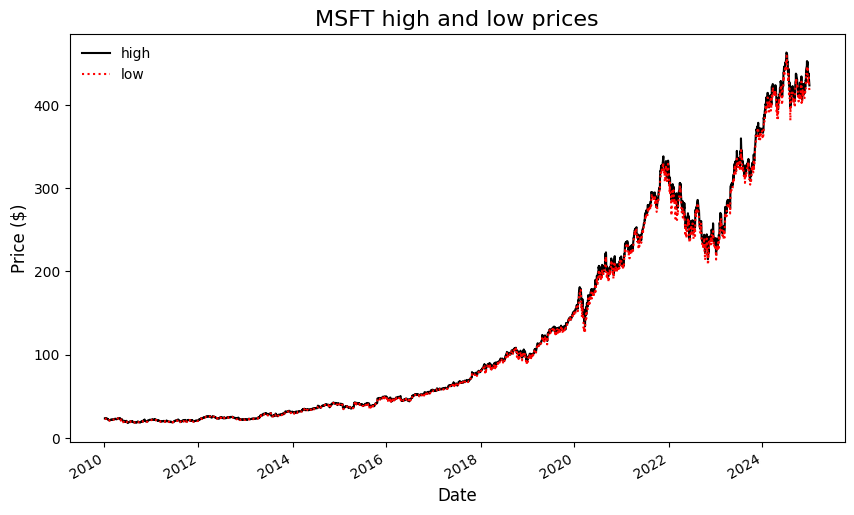

In [15]:
df[['high', 'low']].plot(color=['k', 'r'], figsize=(10,6), style=['-', ':'])
plt.title("MSFT high and low prices", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.legend(frameon=False)

In [18]:
df['ret'] = df['close'].pct_change()
# log returns
df['log_ret'] = np.log(1+df['ret'])

<Axes: xlabel='Date'>

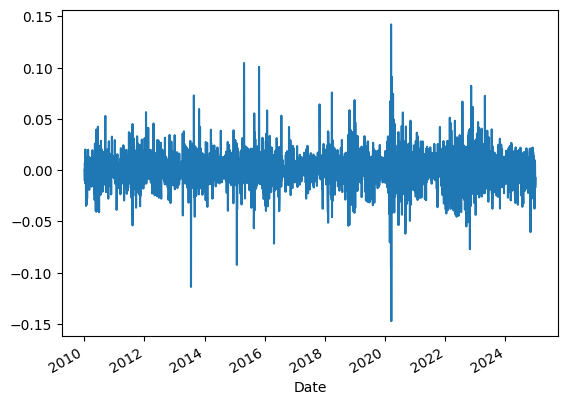

In [ ]:
df['ret'].plot()

In [21]:
df['ret_lag1'] = df['ret'].shift(1)
df['ret_lag2'] = df['ret'].shift(2)

In [22]:
reg = smf.ols('ret ~ ret_lag1 + ret_lag2', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     21.13
Date:                Mon, 19 Jan 2026   Prob (F-statistic):           7.47e-10
Time:                        15:39:21   Log-Likelihood:                 10238.
No. Observations:                3771   AIC:                        -2.047e+04
Df Residuals:                    3768   BIC:                        -2.045e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0010      0.000      3.843      0.000       0.000       0.002
ret_lag1      -0.1059      0.016     -6.500      0.000      -0.138      -0.074
ret_lag2      -0.0130      0.016     -0.795      0.426      -0.045       0.019
==============================================================================
Omnibus:                      519.906   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7019.850
Skew:                          -0.033   Prob(JB):                         0.00
Kurtosis:                       9.684   Cond. No.                         65.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Run OLS regression of return on lag returns using daily data
model = smf.ols('ret ~ ret.shift(1) + ret.shift(2) + ret.shift(3)', data=df).fit()
print(model.summary())

In [19]:
# I want monthly returns
df_monthly = df['close'].resample('M').last()
df_monthly_ret = df_monthly.pct_change()

/var/folders/g0/7_twh6bj5yvgxhmm1f5x3xxnw0xbbk/T/ipykernel_1043/2587793255.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['close'].resample('M').last()


<Axes: xlabel='Date'>

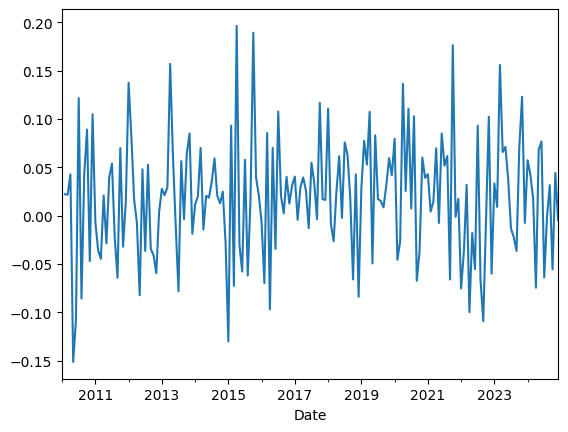

In [20]:
df_monthly_ret.plot()

In [24]:
aapl = yf.download("AAPL", start="2010-01-01", end="2025-01-01")
aapl.columns = ['close', 'high', 'low', 'open', 'vlm']
aapl['aapl_ret'] = aapl['close'].pct_change()


/var/folders/g0/7_twh6bj5yvgxhmm1f5x3xxnw0xbbk/T/ipykernel_1043/311661265.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download("AAPL", start="2010-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [28]:
df2  = df[['ret']].rename(columns={'ret': 'msft_ret'}).join(aapl['aapl_ret'])

In [29]:
df2

,msft_ret,aapl_ret
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000323,0.001729
2010-01-06,-0.006137,-0.015907
2010-01-07,-0.010400,-0.001848
2010-01-08,0.006897,0.006648
...,...,...
2024-12-24,0.009374,0.011478
2024-12-26,-0.002777,0.003176
2024-12-27,-0.017302,-0.013242


<Axes: xlabel='Date'>

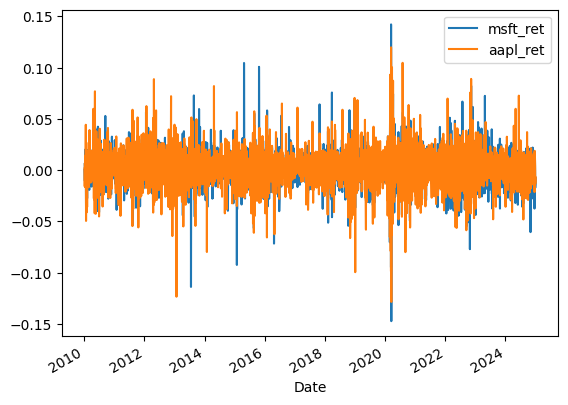

In [30]:
df2.plot()

<Axes: xlabel='Date'>

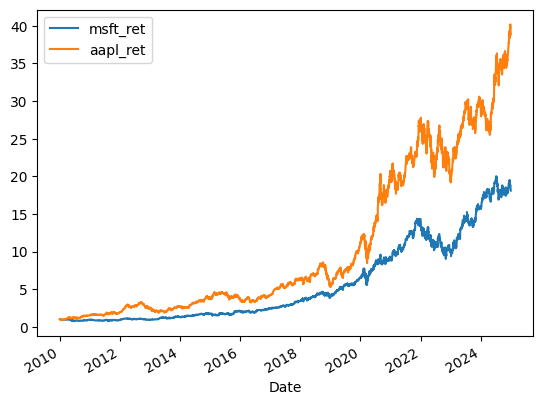

In [32]:
(1+df2).cumprod().plot()